In [5]:
import requests
import os
import csv
import pandas as pd
import json
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from random import randint
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point

In [50]:
# CSV öffnen: 
# Grundbesitz ohne Koordinaten

haus = pd.read_csv('Liegenschaftsbesitzer_ohne_Koordinaten.csv', sep=';')
                     


In [51]:
# Sortieren nach Grundstück-Nummer
haus.sort_values("NameVorname").head(10)

# Zeilen mit NaN in Grundstueck-Nummer löschen
haus = haus.dropna(axis=0, subset=['Name'])

# Sortieren nach Grundstück-Nummer
haus.sort_values("NameVorname").head(10)


,Grundstueck-Nummer,Grundstueck-Typ,Grundstueck-Flaeche,Eigentumsart,Name,Vorname,NameVorname,Adresse,PLZ,Ort,Datum der Abfrage
8898,7004,Liegenschaft,987.0,Chur 4 Ringstrasse,7004,Miteigentum,7004 Miteigentum,SCHUMACHER & BURKHARDT AG,NaN,Pulvermühlestrasse 93,2020-01-11 00:13:03.085757
11424,4800,Liegenschaft,962.0,Stockwerkeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402,Bonaduz,2020-01-10 21:08:13.313870
9229,3060,Liegenschaft,169.0,Alleineigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402,Bonaduz,2019-12-29 02:52:34.636383
9107,11302,Liegenschaft,107.0,Unselbstständiges Grundeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402.0,Bonaduz,2020-01-04 10:34:26.160320
5304,3041,Liegenschaft,290.0,Stockwerkeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402.0,Bonaduz,2019-12-29 02:45:12.816469
12671,11163,Liegenschaft,2133.0,Unselbstständiges Grundeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402.0,Bonaduz,2020-01-11 05:01:28.441697
1383,11156,Liegenschaft,1181.0,Stockwerkeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402,Bonaduz,2019-12-30 14:25:58.441857
6429,1120,Liegenschaft,2667.0,Gesamteigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402,Bonaduz,2020-01-01 10:06:55.323045
4460,3042,Liegenschaft,13.0,Unselbstständiges Grundeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402.0,Bonaduz,2020-01-10 05:00:46.054705
12004,11820,Liegenschaft,1180.0,Stockwerkeigentum,7402 Immobilien AG,NaN,7402 Immobilien AG,Industriestrasse 5,7402,Bonaduz,2019-12-30 15:38:57.302760


In [52]:
haus['Grundstueck-Flaeche'].median()

967.0

In [53]:
haus['Grundstueck-Flaeche'].max()

6591039.0

In [54]:
haus['Grundstueck-Flaeche'].min()

3.0

In [61]:
# die 50 grössten Grundstück-Besitzer von Chur (Anzahl Grundstücke)

haus['NameVorname'].value_counts().head(50)

Stadt Chur                                  917
Kanton Graubünden                           114
Bürgergemeinde Chur                         101
Politische Gemeinde Maladers                 78
domenig IMMOBILIEN AG                        44
Caflisch Josina                              31
Pensionskasse Graubünden                     31
Priesterseminar St. Luzi                     31
Zindel AG                                    28
Graubündner Kantonalbank                     28
Mensa episcopalis curiensis                  28
Hassler Armin                                27
Rhätische Bahn AG (RhB)                      26
Caflisch Mathias                             22
Wohngenossenschaft Stampagarten in Chur      22
Brunold Jürg                                 22
Prada Immo AG                                20
Mehli Christian                              19
Norbert Candinas AG                          18
Evangelische Kirchgemeinde Chur              18
Barson AG                               

In [56]:
# die 50 grössten Grundstück-Besitzer von Chur (grösste Fläche)

grossbesitzer = haus.groupby('NameVorname')['Grundstueck-Flaeche'].max().sort_values(ascending=False).head(10)
grossbesitzer

NameVorname
Bürgergemeinde Chur                        6591039.0
Politische Gemeinde Maladers               1850202.0
Mensa episcopalis curiensis                 778273.0
Schweizerische Eidgenossenschaft (VBS)      537447.0
Stadt Chur                                  190703.0
Caflisch Josina                             182376.0
Kanton Graubünden                           120353.0
Rhätische Bahn AG (RhB)                     117376.0
Meier Christian                             101317.0
Plankis Stiftung                            101128.0
Name: Grundstueck-Flaeche, dtype: float64

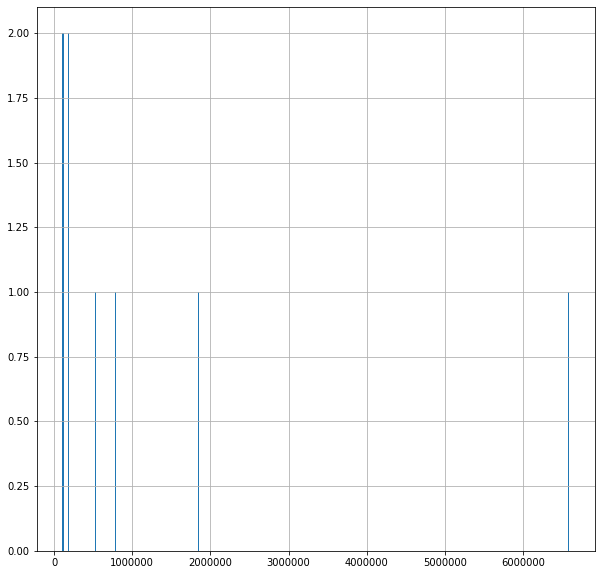

In [57]:
# die 50 grössten Grundstück-Besitzer von Chur
grossbesitzer.astype(float).hist(bins=500, figsize=(10,10))